# **Clustering Facebook Live Sellers**

The code below is taken from Prashant Banerjee's submission on [kaggle.com](https://www.kaggle.com/prashant111/k-means-clustering-with-python/notebook).

You are encouraged to go to the link above and check out the full code. In this lab, you will do the necessary steps to explore the data and prepare it for sklearn algorithms.

**About the data set**

Live selling is becoming increasingly popular in Asian countries. Small vendors can now reach a wider audience and connect with many customers. 

K-Means clustering is used to find intrinsic groups within the unlabelled dataset and draw inferences from them. In this kernel, you will implement K-Means clustering to find intrinsic groups within the dataset that display the same status_type behaviour.

**Import libraries**

In [54]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Acquire data

In [55]:
df = pd.read_csv('UnsupervisedLearning/FacebookLiveSellers/Live.csv')

#TODO: Write code to inspect the first five rows of the data frame
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


# Inspect data

In [56]:
#TODO: Write code to inspect the shape of the data frame

df.shape

(7050, 16)

In [57]:
#TODO: Write code to get information about null values in the data frame

df.isnull()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
7046,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
7047,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True
7048,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True


# Clean data

In [58]:
# Drop the four redundant columns in the data set
df.drop(['Column1', 'Column2', 'Column3', 'Column4'], 
axis=1, inplace=True)

In [59]:
# Check the summary again 
# to see if there are no redundant columns remaining
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   object
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(9), object(3)
memory usage: 661.1+ KB


In [60]:
#TODO: Write code to inspect statistical information about the data set

df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000


Note that there are 3 categorical variables in the dataset. We will explore them one by one

In [61]:
# View the labels in the variable

df['status_id'].unique()

array(['246675545449582_1649696485147474',
       '246675545449582_1649426988507757',
       '246675545449582_1648730588577397', ...,
       '1050855161656896_1060126464063099',
       '1050855161656896_1058663487542730',
       '1050855161656896_1050858841656528'], dtype=object)

In [62]:
# View how many different types of variables are there

len(df['status_id'].unique())

6997

In [63]:
#TODO: Write code to view the labels in the variable status_published

df['status_published'].unique()

array(['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17', ...,
       '9/21/2016 23:03', '9/20/2016 0:43', '9/10/2016 10:30'],
      dtype=object)

In [64]:
#TODO: write code to view how many different types of variables 
# there are in status_published

len(df['status_published'].unique())


6913

In [65]:
#TODO: Write code to view the labels in the variable status_type

df['status_type'].unique()

array(['video', 'photo', 'link', 'status'], dtype=object)

In [66]:
#TODO: write code to view how many different types of variables 
# there are in status_type

len(df['status_type'].unique())

4

From the above inspection, we realize that there are 6997 unique labels in the status_id variable and 6913 unique labels in the status_published variable. 

The total number of instances in the dataset is 7050, which means that these two variables are approximately unique identifiers for each of the instances. Thus these are not variables that we can use, and we should drop them.

In [67]:
#TODO: Write code to drop status_id and status_published

df = df.drop(columns=['status_id', 'status_published'])

In [68]:
# View a summary of the data set again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   status_type    7050 non-null   object
 1   num_reactions  7050 non-null   int64 
 2   num_comments   7050 non-null   int64 
 3   num_shares     7050 non-null   int64 
 4   num_likes      7050 non-null   int64 
 5   num_loves      7050 non-null   int64 
 6   num_wows       7050 non-null   int64 
 7   num_hahas      7050 non-null   int64 
 8   num_sads       7050 non-null   int64 
 9   num_angrys     7050 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 550.9+ KB


In [69]:
#TODO: Write code to inspect the first five rows of the data frame

df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


**Converting**

There is 1 non-numeric column status_type in the dataset. We will convert it into integer equivalents.

In [70]:
from sklearn.preprocessing import LabelEncoder

# Split the data set into X and y

X = df

y = df['status_type']

le = LabelEncoder()

X['status_type'] = le.fit_transform(X['status_type'])

y = le.transform(y)

Inspect X 

In [71]:
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


**Feature Scaling**

In [72]:
# Like in lab 1, use the MinMax scaler to scale values for better accuracy.

from sklearn.preprocessing import MinMaxScaler
cols = X.columns
ms = MinMaxScaler()

X = ms.fit_transform(X)
X = pd.DataFrame(X, columns=[cols])

# Earn Your Wings

Implement a K-Means Clustering algorithm on the cleaned data set. Use the elbow method to find the right value of k to use.
Add comments in your code to explain each step that you take in your implementation.

In [73]:
from sklearn.cluster import KMeans

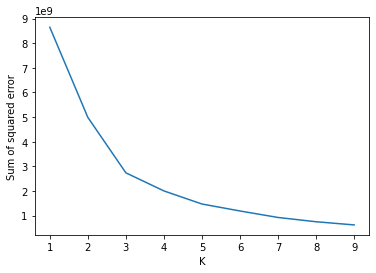

In [74]:
# Define a range for possible k values.
k_rng = range(1,10)

# Declare an array to store the values from the sum of squared error values.
sse = []

# Using a for loop, go through each value in the k range and compute the sse value
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sse.append(km.inertia_)

# Plot the sse value for each k.
# Notice that 3 is the elbow value.
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [87]:
# Define a KMeans object with 3 as the value of k. Call the object km
km = KMeans(n_clusters=3)

# Save the prediction in an array and call it y_predicted
y_predicted = km.fit_predict(df)

# Visualize the array.
y_predicted

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [76]:
# Add a column to the data frame to store the predicted cluster ID of each element
df['cluster'] = y_predicted

#Inspect the first five rows of the data set by using the head() function
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,cluster
0,3,529,512,262,432,92,3,1,1,0,0
1,1,150,0,0,150,0,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0,0
3,1,111,0,0,111,0,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0,0


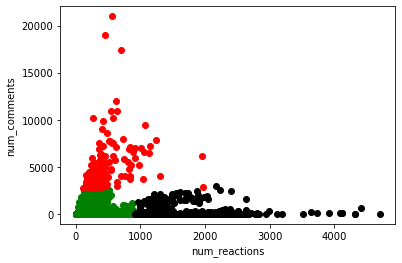

In [86]:
# Define the three data frames, df1, df2, df3, each belonging to one of the three clusters
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

# Plot the data frames with different colors to differentiate them
plt.scatter(df1['num_reactions'],df1['num_comments'],color='green')
plt.scatter(df2['num_reactions'],df2['num_comments'],color='red')
plt.scatter(df3['num_reactions'],df3['num_comments'],color='black')

# Define the labels on the x and y axes
plt.xlabel('num_reactions')
plt.ylabel('num_comments')

plt.show()

Above is a proof of concept of our clustering. Note that we selected 2 attributes of many to demonstrate our clustering in a 2D graph.